# EDA

Create your own EDA below/ Create as many code-blocks as you need.

Once you've completed your EDA, complete the section titled **Reflections** where you will answer questions about your EDA.

**Note**: Since this dataset is large, visualizations might load slower. You may want to consider using the `sample()` method if this dataset is too large for your computer to process in a reasonable amount of time.

In [5]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [7]:
# import data 
transactions = pd.read_csv(r"C:\Users\tosth\OneDrive\Documents\detect-fraud\detect-fraud\bank_transactions.csv")

transactions.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,983.09,C1454812978,36730.24,35747.15,M1491308340,0.00,0.00,0,0
1,PAYMENT,55215.25,C1031766358,99414.00,44198.75,M2102868029,0.00,0.00,0,0
2,CASH_IN,220986.01,C1451868666,7773074.97,7994060.98,C1339195526,924031.48,703045.48,0,0
3,TRANSFER,2357394.75,C458368123,0.00,0.00,C620979654,4202580.45,6559975.19,0,0
4,CASH_OUT,67990.14,C1098978063,0.00,0.00,C142246322,625317.04,693307.19,0,0


In [8]:
print(transactions.columns)

Index(['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


In [9]:
# TODO: view the shape of your data
print(transactions.shape)

(1000000, 10)


In [10]:
print(transactions.columns)

Index(['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


In [11]:
# TODO: Begin your EDA
numeric_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
categorical_cols = ['type','isFraud', 'isFlaggedFraud', 'transaction_type', 'is_fraudulent']

In [12]:
transactions[numeric_cols].describe()
transactions['amount_transformed'] = np.log1p(transactions['amount'])

In [13]:
print(transactions.columns)

Index(['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'amount_transformed'],
      dtype='object')


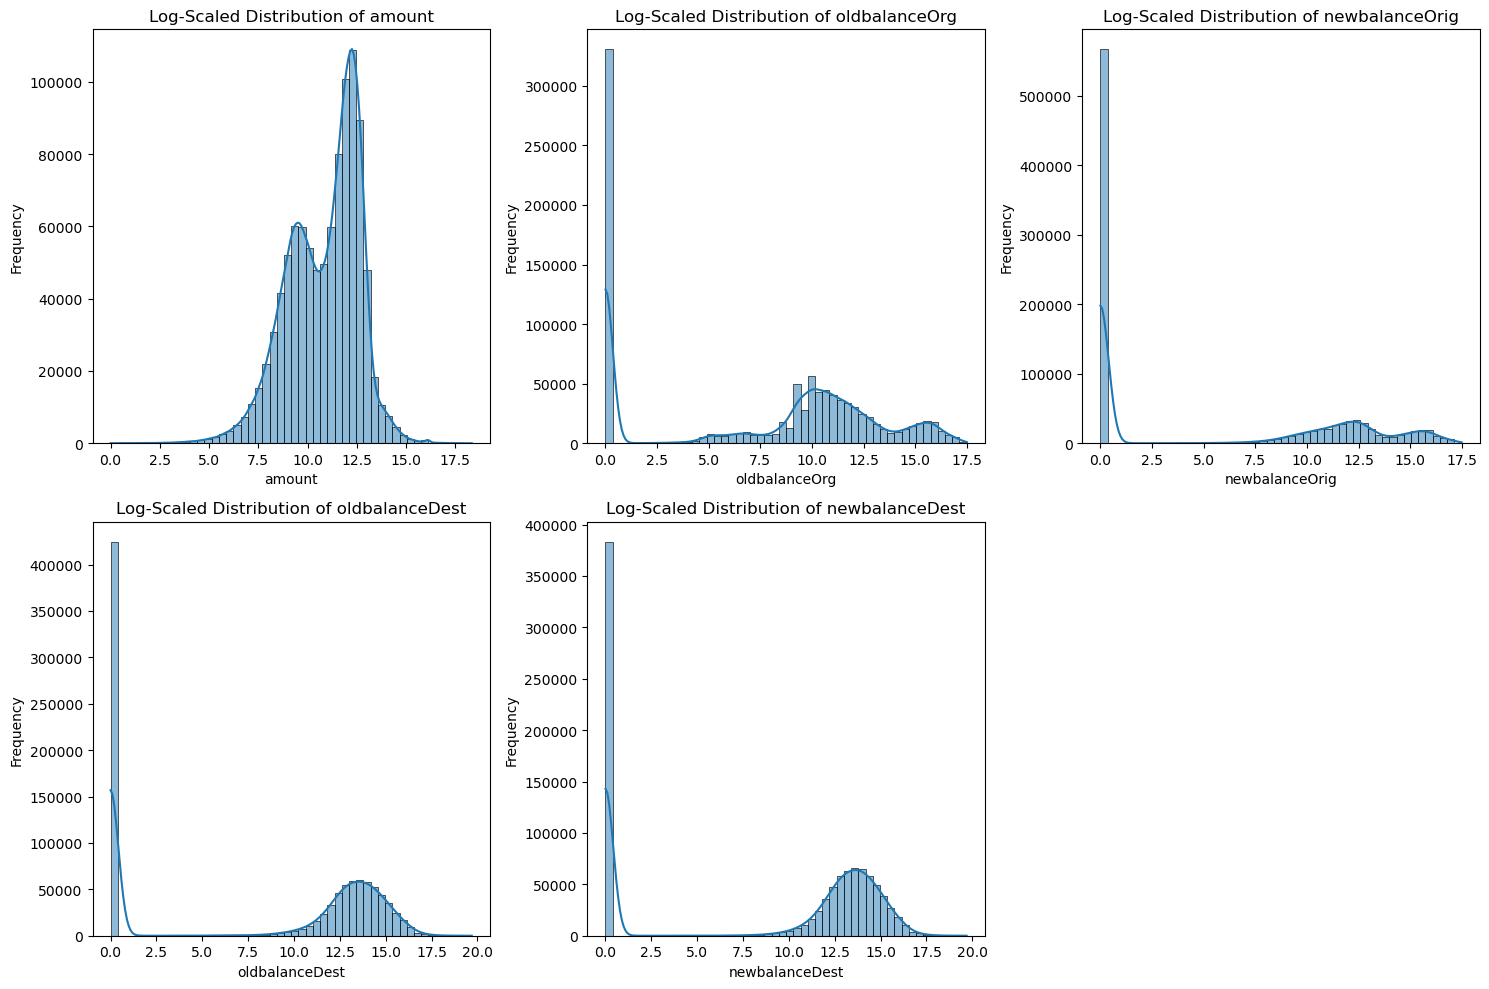

In [169]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i + 1)
    
    # Apply log transformation to the data
    log_data = np.log1p(transactions[col])
    
    # Plot log-transformed histogram
    sns.histplot(log_data, bins=50, kde=True)
    
    plt.title(f'Log-Scaled Distribution of {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [14]:
np.random.seed(42)
n = 1000


In [15]:
transactions = pd.DataFrame({
    'transaction_amount': np.random.exponential(scale=100, size=n),
    'account_balance': np.random.normal(loc=500, scale=150, size=n),
    'transaction_type': np.random.choice(['purchase', 'withdrawal', 'deposit'], size=n),
    'is_fraudulent': np.random.choice([0, 1], size=n, p=[0.95, 0.05]),
    'customer_age': np.random.normal(loc=35, scale=10, size=n),
    'transaction_duration': np.random.exponential(scale=30, size=n)
})


In [16]:
print(transactions.columns)

Index(['transaction_amount', 'account_balance', 'transaction_type',
       'is_fraudulent', 'customer_age', 'transaction_duration'],
      dtype='object')


## Reflections

Answer each question based on the visualizations that you've generated.

Remember, you must justify your answers with proof.

### Q1

Take a closer look at the numeric features in your dataset. How are these values distributed and what might this tell you about how most transactions behave compared to a few **rare** ones?

**Hint**: Consider using visualizations that highlight frequency across value ranges.

ANSWER
According to the data most of the values distributed are clustered together with the exeption of a few values. This indicates a normal distribution. The clustered data indicates the normal class.

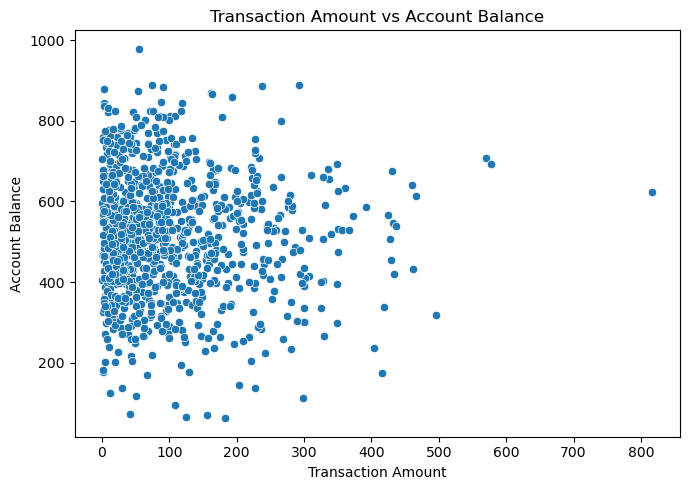

In [17]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=transactions, x='transaction_amount', y='account_balance')
plt.title('Transaction Amount vs Account Balance')
plt.xlabel('Transaction Amount')
plt.ylabel('Account Balance')
plt.tight_layout()
plt.show()

### Q2

When comparing different numerical features against one another, do any interesting patterns emerge for transactions marked as fraudulent? Are there particular regions or ranges where these transactions seem to concentrate?

**Hint**: Try comparing two numeric features at a time while distinguishing between fraud and non-fraud. Use visual cues to spot clusters or anomalies.



ANSWER 
There are no specific patterns for transactions marked as fraud and the fraud transctions do not cluster anywhere specifically

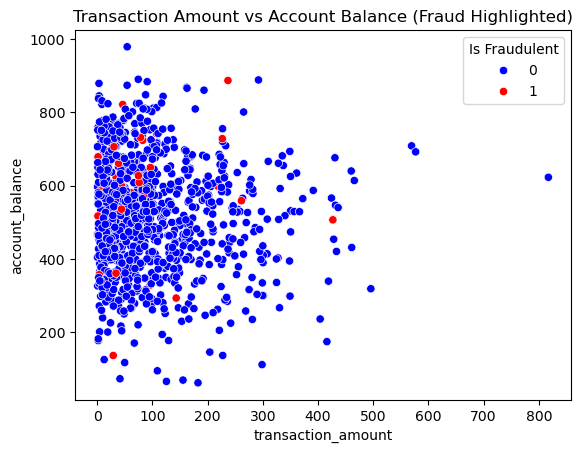

In [18]:
sns.scatterplot(
    data=transactions,
    x='transaction_amount',
    y='account_balance',
    hue='is_fraudulent',  
    palette={0: 'blue', 1: 'red'}
)
plt.title('Transaction Amount vs Account Balance (Fraud Highlighted)')
plt.legend(title='Is Fraudulent')
plt.show()

### Q3

How do types of transaction relate to the typical amounts involved? Are some types of transactions consistently larger or smaller than others?

**Hint**: Break the dataset down by transaction type and compare summary statistics.

ANSWER 
Deposits have larger outliers but there are no significant types of transactions that are larger or smaller than others.  

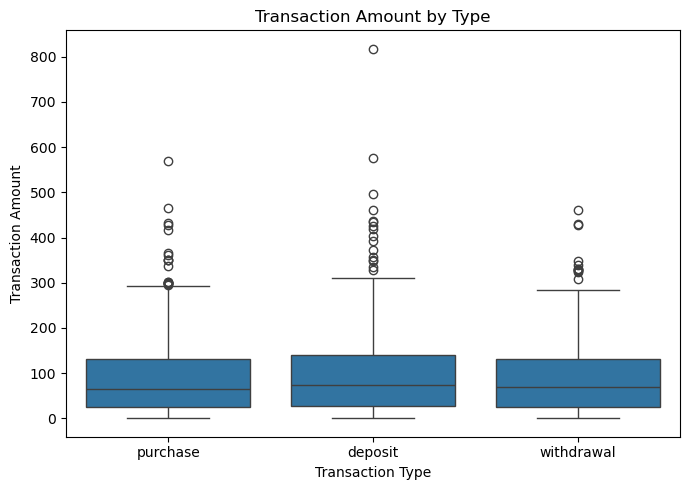

In [19]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=transactions, x='transaction_type', y='transaction_amount')
plt.title('Transaction Amount by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')
plt.tight_layout()
plt.show()


In [20]:
summary_stats = transactions.groupby('transaction_type')['transaction_amount'].describe()
print(summary_stats)

                  count   mean    std  min   25%   50%    75%    max
transaction_type                                                    
deposit          331.00 104.44 108.01 0.51 27.81 74.39 141.35 817.24
purchase         363.00  95.54  95.15 0.46 24.91 64.15 132.25 569.49
withdrawal       306.00  91.50  86.70 1.09 25.47 68.50 130.49 460.12


### Q4

Do transaction amounts vary when you compare fraudulent and non-fraudulent transactions across different transaction types? What patterns emerge when you look at both fraud status and transaction type together?

**Hint**:  Try summarizing average transaction amounts by both fraud label and transaction type to compare across categories.

Transactio amounts do greatly vary when it comes to deposit and withdrawls.

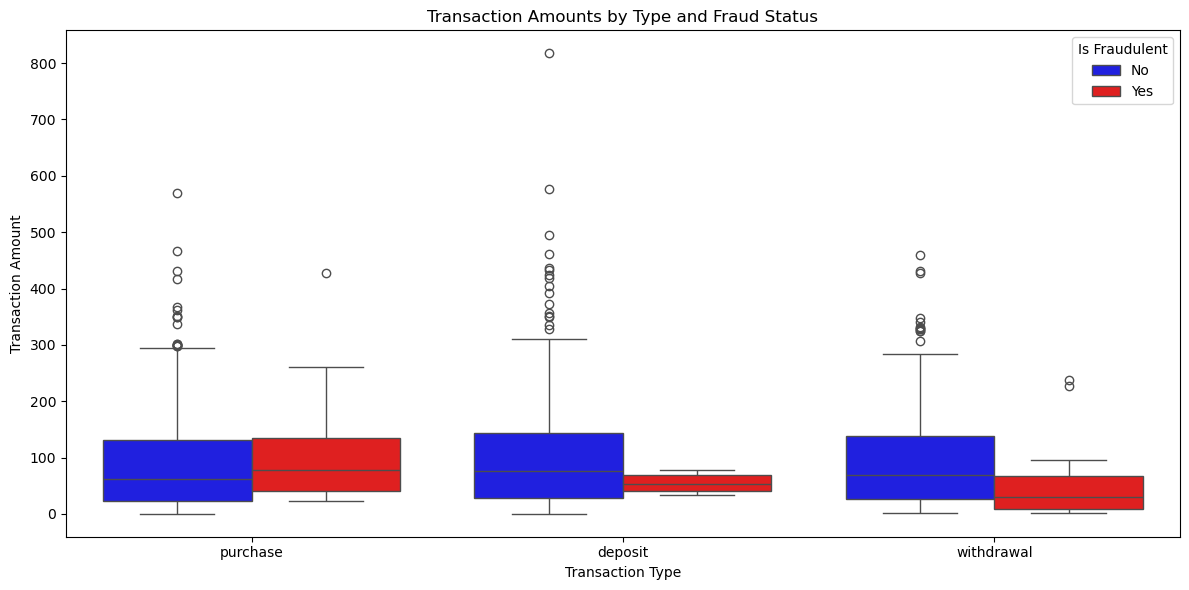

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=transactions,
    x='transaction_type',
    y='transaction_amount',
    hue='is_fraudulent',
    palette={0: 'blue', 1: 'red'}  # Custom colors
)
plt.title('Transaction Amounts by Type and Fraud Status')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')

# Update legend labels
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=['No', 'Yes'], title='Is Fraudulent')

plt.tight_layout()
plt.show()

In [25]:
summary_stats = transactions.groupby('transaction_type')['transaction_amount'].describe()
print(summary_stats)

                  count   mean    std  min   25%   50%    75%    max
transaction_type                                                    
deposit          331.00 104.44 108.01 0.51 27.81 74.39 141.35 817.24
purchase         363.00  95.54  95.15 0.46 24.91 64.15 132.25 569.49
withdrawal       306.00  91.50  86.70 1.09 25.47 68.50 130.49 460.12


## Q5

Consider how well the system's built-in fraud flag (`isFlaggedFraud`) aligns with actual fraudulent activity. Are there mismatches? What does this tell you about the system's current performance?

**Hint**: Try organizing the data in a way that shows how often flagged transactions are truly fraudulent and how often fraud goes unflagged.

Answer
The system is not handling class imbalance well. It's heavily biased toward predicting "Not Fraud" and barely catching any actual fraud. ➤ There are non-fraud transactions correctly flagged as not fraud. Fraudulent transactions missed by the system. This is bad especially for fraud detection. Only one fraud transaction was correctly flagged.

In [26]:
transactions = pd.read_csv(r"C:\Users\tosth\OneDrive\Documents\detect-fraud\detect-fraud\bank_transactions.csv")

transactions.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,983.09,C1454812978,36730.24,35747.15,M1491308340,0.00,0.00,0,0
1,PAYMENT,55215.25,C1031766358,99414.00,44198.75,M2102868029,0.00,0.00,0,0
2,CASH_IN,220986.01,C1451868666,7773074.97,7994060.98,C1339195526,924031.48,703045.48,0,0
3,TRANSFER,2357394.75,C458368123,0.00,0.00,C620979654,4202580.45,6559975.19,0,0
4,CASH_OUT,67990.14,C1098978063,0.00,0.00,C142246322,625317.04,693307.19,0,0


In [27]:
print(transactions.columns)

Index(['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


In [28]:
# Create a pivot table (similar to a confusion matrix)
pivot_table = pd.pivot_table(
    transactions,
    index='isFraud',
    columns='isFlaggedFraud',
    aggfunc='size',
    fill_value=0
)

# Rename axes for clarity
pivot_table.index.name = 'Actual Fraud'
pivot_table.columns.name = 'Flagged by System'

# Show pivot table
print(pivot_table)

Flagged by System       0  1
Actual Fraud                
0                  998703  0
1                    1296  1


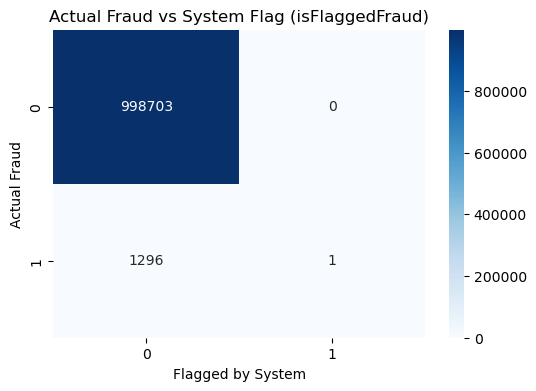

In [185]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.title('Actual Fraud vs System Flag (isFlaggedFraud)')
plt.show()

In [29]:
print(transactions.columns)

Index(['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


In [31]:
import numpy as np
transactions['log_amount'] = np.log1p(transactions['amount'])